# Polar plot for one cell, one experiment

## Pick experiment and cell

In [1]:
drive_path = '/media/stephen/Brain20191/allen-brain-observatory/visual-coding-2p/'

In [2]:
import os
import pandas as pd
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import allensdk.brain_observatory.stimulus_info as stim_info
from utils.data_wrappers import *
manifest_file = os.path.join(drive_path,'manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_file)

In [3]:
exp = boc.get_ophys_experiments(stimuli=[stim_info.DRIFTING_GRATINGS],
        targeted_structures = ['VISl'],
        imaging_depths = [175],
        cre_lines = ['Cux2-CreERT2'])[0]
exp_id = 502793808
exp_container_id = 511510640
exp

{'id': 502793808,
 'imaging_depth': 175,
 'targeted_structure': 'VISl',
 'cre_line': 'Cux2-CreERT2',
 'reporter_line': 'Ai93(TITL-GCaMP6f)',
 'acquisition_age_days': 117,
 'experiment_container_id': 511510640,
 'session_type': 'three_session_A',
 'donor_name': '222426',
 'specimen_name': 'Cux2-CreERT2;Camk2a-tTA;Ai93-222426',
 'fail_eye_tracking': True}

In [4]:
cells = boc.get_cell_specimens()
cells = pd.DataFrame.from_records(cells)
cell_specimen_id = 517416426

In [5]:
cells[cells['cell_specimen_id'] == cell_specimen_id]

,all_stim,area,cell_specimen_id,donor_full_genotype,dsi_dg,experiment_container_id,failed_experiment_container,g_dsi_dg,g_osi_dg,g_osi_sg,...,specimen_id,tfdi_dg,time_to_peak_ns,time_to_peak_sg,tld1_id,tld1_name,tld2_id,tld2_name,tlr1_id,tlr1_name
1183,False,VISl,517416426,Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6...,0.880052,511510640,False,0.54074,0.551907,NaN,...,495727015,0.37459,NaN,NaN,177839004,Cux2-CreERT2,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)


In [6]:
from utils.data_wrappers import *
dg_response_filter = get_dg_response_filter_from_saskia()
dg_response_filter[dg_response_filter['cell_specimen_id'] == cell_specimen_id]

,cell_specimen_id,responsive
6420,517416426,True


Hooray! We found cell **517416426** in experiment container **511510640**, where the experiment is **[dg, VISl, 175, Cux2-CreERT2]**, and the cell is **responsive**

## Polar plot

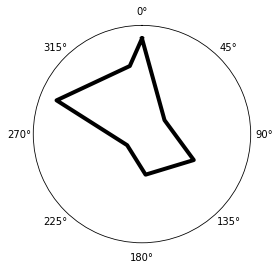

In [7]:
from utils.polarplot import *
from utils.polardata import *
 
polardata = get_mock_polardata(exp_id, cell_specimen_id)
theta, r = zip(*polardata)
fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
polar_plot(axes, theta, r, color='black', linewidth=4)

# Polar plot for all cells in one experiment

Get responsive cells in this experiment

In [8]:
exp_id = 502793808
ec_id = 511510640
exps = boc.get_ophys_experiments(
    experiment_container_ids=[ec_id],
    stimuli=[stim_info.DRIFTING_GRATINGS])
exps = pd.DataFrame.from_dict(exps)
cells = boc.get_cell_specimens()
cells = pd.DataFrame.from_records(cells)

dg_response_filter = get_dg_response_filter_from_saskia()
in_category_cells = cells[cells.experiment_container_id == ec_id]
responsive_cells = get_filtered_cells(in_category_cells, dg_response_filter)
print ("In this experiment, we have", len(in_category_cells),
       "cells, but after filtering for responsive, we have", len(responsive_cells), "cells")


In this experiment, we have 263 cells, but after filtering for responsive, we have 90 cells


Generate all the data

In [9]:
cells_polar_data = []
for cell_specimen_id in responsive_cells.cell_specimen_id:
    one_cell_polar_data = get_mock_polardata(experiment_id = exp_id, cell_specimen_id = cell_specimen_id)
    cells_polar_data.append(one_cell_polar_data)

Plot em

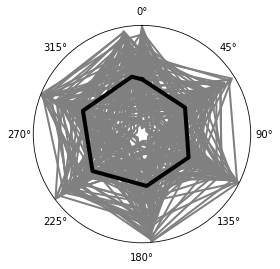

In [10]:
# Each row = 1 cell. Column = angle, magnitude
thetas = []
rs = []
for cell_polar_data in cells_polar_data:
    theta, r = zip(*cell_polar_data)
    thetas.append(theta)
    rs.append(r)

median_theta, median_r = get_median_polar(thetas, rs)

fig, axes = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(polar=True))
polar_plot_population(ax=axes,
                      bold_theta = median_theta,
                      bold_r = median_r,
                      grey_thetas = thetas, 
                      grey_rs = rs)
